In [1]:
import sys

import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

sys.path.append('/g/data/wp00/shared_code/qqscale')
import utils

In [2]:
xvals = np.arange(0, 100, 0.1)

In [3]:
quantiles = np.arange(0.005, 1.0, 0.01)
quantiles

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

## Cannon example

See Section 4 of [Cannon et al (2015)](https://journals.ametsoc.org/view/journals/clim/28/17/jcli-d-14-00754.1.xml#bib44).

In [106]:
obs_shape = 4.0
obs_scale = 7.5
hist_shape = 8.15
hist_scale = 3.68
future_shape = 16
future_scale = 2.63
#future_shape = 4.8
#future_scale = 5

In [107]:
future_shape * future_scale

42.08

In [108]:
obs_pdf = gamma.pdf(xvals, a=obs_shape, scale=obs_scale)
hist_pdf = gamma.pdf(xvals, a=hist_shape, scale=hist_scale)
future_pdf = gamma.pdf(xvals, a=future_shape, scale=future_scale)

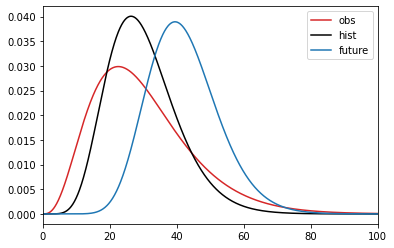

In [109]:
plt.plot(xvals, obs_pdf, color='tab:red', label='obs')
plt.plot(xvals, hist_pdf, color='black', label='hist')
plt.plot(xvals, future_pdf, color='tab:blue', label='future')
plt.legend()
plt.xlim(0, 100)
plt.show()

In [110]:
hist_mean = gamma.mean(a=hist_shape, scale=hist_scale)
hist_mean

29.992

In [111]:
future_mean = gamma.mean(a=future_shape, scale=future_scale)
future_mean

42.08

In [112]:
mean_scaling = future_mean / hist_mean
mean_scaling

1.403040810882902

In [114]:
len(quantiles)

100

In [115]:
obs_quantiles = gamma.ppf(quantiles, a=obs_shape, scale=obs_scale)
hist_quantiles = gamma.ppf(quantiles, a=hist_shape, scale=hist_scale)
future_quantiles = gamma.ppf(quantiles, a=future_shape, scale=future_scale)

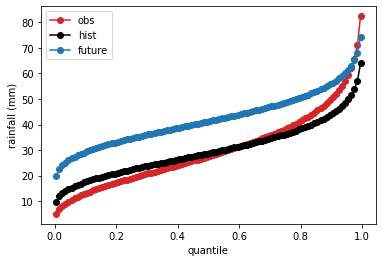

In [116]:
plt.plot(quantiles, obs_quantiles, marker='o', color='tab:red', label='obs')
plt.plot(quantiles, hist_quantiles, marker='o', color='black', label='hist')
plt.plot(quantiles, future_quantiles, marker='o', color='tab:blue', label='future')
plt.legend()
plt.ylabel('rainfall (mm)')
plt.xlabel('quantile')
plt.show()

In [117]:
gamma.std(a=obs_shape, scale=obs_scale)

15.0

In [118]:
gamma.std(a=hist_shape, scale=hist_scale)

10.505739383784466

In [119]:
gamma.std(a=future_shape, scale=future_scale)

10.52

In [120]:
adjustment_factors = future_quantiles / hist_quantiles

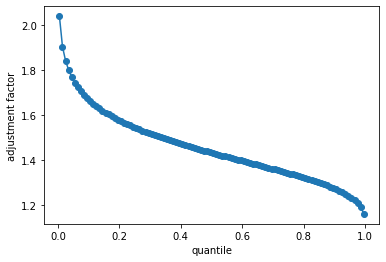

In [121]:
plt.plot(quantiles, adjustment_factors, marker='o')
plt.ylabel('adjustment factor')
plt.xlabel('quantile')
plt.show()

In [122]:
hist_adjusted = adjustment_factors * hist_quantiles
(hist_adjusted.sum() - hist_quantiles.sum()) / hist_quantiles.sum()

0.4033826330737879

In [123]:
mean_scaling

1.403040810882902

In [124]:
obs_adjusted = adjustment_factors * obs_quantiles
(obs_adjusted.sum() - obs_quantiles.sum()) / obs_quantiles.sum()

0.38321725478096996

So the multiplicative adjustment factors are larger at lower quantiles because the relative difference between the historical and future values is greater at lower rainfall amounts.

If the model underestimates the observed variance, a relatively lower proportion of the observed rainfall is at lower amounts (to recieve the bigger adjustment) so the magnitude of the qq-scaled change is smaller than the magnitude of the GCM change.

TODO: Figure out if the same applies when the shape parameter is less than one (i.e. a more realistic distribution)

## Real data

In [25]:
hist_file = "/g/data/wp00/data/QQ-CMIP6/ACCESS-ESM1-5/historical/r1i1p1f1/day/pr/v20191115/pr-ssr_day_ACCESS-ESM1-5_historical_r1i1p1f1_gn_19950101-20141231.nc"
future_file = "/g/data/wp00/data/QQ-CMIP6/ACCESS-ESM1-5/ssp370/r1i1p1f1/day/pr/v20191115/pr-ssr_day_ACCESS-ESM1-5_ssp370_r1i1p1f1_gn_20560101-20851231.nc"
obs_file = "/g/data/wp00/data/AGCD/precip-ssr_AGCD_r005_19900101-20191231_daily.nc"
hist_time_bounds = ["1995-01-01", "2014-12-31"]
future_time_bounds = ["2065-01-01", "2084-12-31"]
obs_time_bounds = ["1995-01-01", "2014-12-31"]

In [5]:
hist_units = "mm day-1"
future_units = "mm day-1"
obs_units = "mm day-1"
output_units = "mm day-1"
hist_var = "pr"
future_var = "pr"
obs_var = "precip"

In [6]:
city_lat_lon = {
    'Hobart': (-42.9, 147.3),
    'Melbourne': (-37.8, 145.0),
    'Thredbo': (-36.5, 148.3),
    'Sydney': (-33.9, 151.2),
    'Brisbane': (-27.5, 153.0),
    'Cairns': (-16.9, 145.8),
    'Darwin': (-12.5, 130.8),
    'Alice Springs': (-23.7, 133.9),
    'Port Hedland': (-20.3, 118.6),
    'Geraldton': (-28.8, 114.6),
    'Perth': (-32.0, 115.9),
    'Adelaide': (-34.9, 138.6),
}

In [7]:
lat, lon = city_lat_lon['Geraldton']
point_selection = {'lat': lat, 'lon': lon}

In [8]:
ds_hist = utils.read_data(
    hist_file,
    hist_var,
    time_bounds=hist_time_bounds,
    input_units=hist_units,
    output_units=output_units,
)

In [9]:
da_hist_point = ds_hist[hist_var].sel(point_selection, method='nearest')

In [10]:
da_hist_point = da_hist_point.compute()

In [11]:
hist_shape, hist_loc, hist_scale = gamma.fit(da_hist_point.data)
print("Historical")
print(f"Shape: {hist_shape}")
print(f"Location: {hist_loc}")
print(f"Scale: {hist_scale}")

Historical
Shape: 0.014281283464119946
Location: 4.4520891040288637e-07
Scale: 1.5487260403981002


In [26]:
ds_future = utils.read_data(
    future_file,
    future_var,
    time_bounds=future_time_bounds,
    input_units=future_units,
    output_units=output_units,
)

In [27]:
da_future_point = ds_future[future_var].sel(point_selection, method='nearest')

In [28]:
da_future_point = da_future_point.compute()

In [29]:
future_shape, future_loc, future_scale = gamma.fit(da_future_point.data)
print("Future")
print(f"Shape: {future_shape}")
print(f"Location: {future_loc}")
print(f"Scale: {future_scale}")

Future
Shape: 0.03105457971156212
Location: 2.0277689821428522e-07
Scale: 1.537388250352415


In [16]:
ds_obs = utils.read_data(
    obs_file,
    obs_var,
    time_bounds=obs_time_bounds,
    input_units=obs_units,
    output_units=output_units
)

In [17]:
da_obs_point = ds_obs[obs_var].sel(point_selection, method='nearest')

In [18]:
da_obs_point = da_obs_point.compute()

In [19]:
obs_shape, obs_loc, obs_scale = gamma.fit(da_obs_point.data)
print("Obs")
print(f"Shape: {obs_shape}")
print(f"Location: {obs_loc}")
print(f"Scale: {obs_scale}")

Obs
Shape: 0.08232290401679743
Location: 5.694562311046417e-07
Scale: 1.5479273668871094


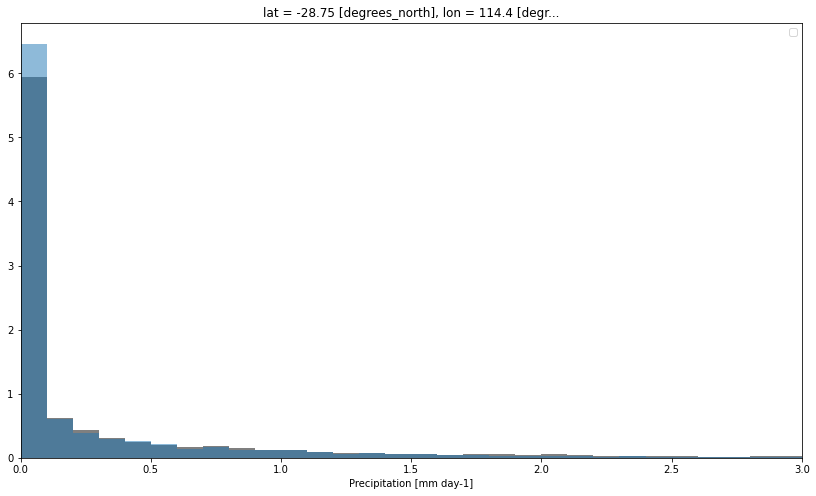

In [36]:
plt.figure(figsize=(14, 8))

#obs_hist = da_obs_point.plot.hist(bins=100, density=True, alpha=0.5, color='tab:red')
#obs_gamma = gamma.pdf(xvals, obs_shape, scale=obs_scale)
#plt.plot(xvals, obs_gamma, color='tab:red', linewidth=4.0, label='obs')

hist_hist = da_hist_point.plot.hist(bins=np.arange(0, 50, 0.1), density=True, alpha=0.5, color='black')
#hist_gamma = gamma.pdf(xvals, hist_shape, scale=hist_scale)
#plt.plot(xvals, hist_gamma, color='black', linewidth=4.0, label='hist')

future_hist = da_future_point.plot.hist(bins=np.arange(0, 50, 0.1), density=True, alpha=0.5, color='tab:blue')
#future_gamma = gamma.pdf(xvals, future_shape, scale=hist_scale)
#plt.plot(xvals, future_gamma, color='tab:blue', linewidth=4.0, label='future')

plt.legend()
plt.xlim(0, 3)
#plt.ylim(0, 0.1)
plt.show()

In [22]:
da_hist_point.data.mean()

0.8606252580753984

In [23]:
hist_mean = gamma.mean(a=hist_shape, scale=hist_scale)
hist_mean

0.02211779559118935

In [32]:
da_future_point.data.mean()

0.5526215448147221

In [33]:
future_mean = gamma.mean(a=future_shape, scale=future_scale)
future_mean

0.047742945968188094

In [70]:
obs_quantiles = gamma.ppf(quantiles, a=obs_shape, scale=obs_scale)
hist_quantiles = gamma.ppf(quantiles, a=hist_shape, scale=hist_scale)
future_quantiles = gamma.ppf(quantiles, a=future_shape, scale=future_scale)

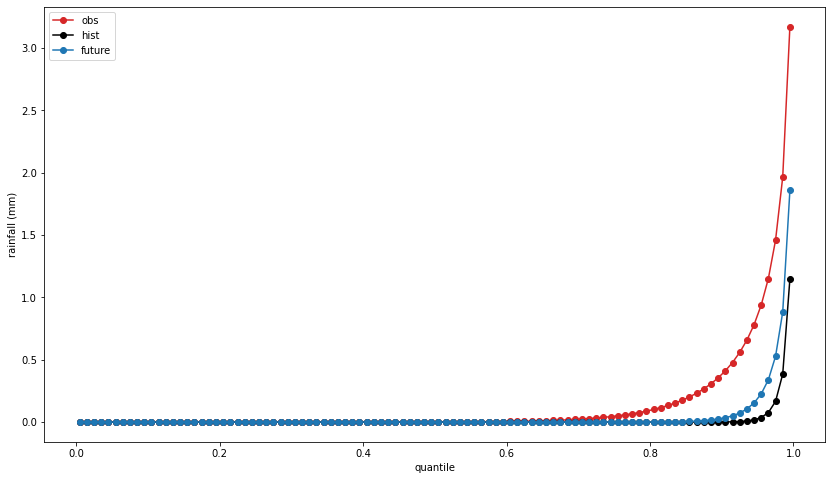

In [72]:
plt.figure(figsize=(14, 8))
plt.plot(quantiles, obs_quantiles, marker='o', color='tab:red', label='obs')
plt.plot(quantiles, hist_quantiles, marker='o', color='black', label='hist')
plt.plot(quantiles, future_quantiles, marker='o', color='tab:blue', label='future')
plt.legend()
plt.ylabel('rainfall (mm)')
plt.xlabel('quantile')
plt.show()

TODO: The distributions based on real data aren't working... just try plotting the quantiles for hist, future and obs and see if anything can be learned.